In [ ]:
! pip install importlib-metadata==4.13.0
! pip install xarray==0.20.1

  Attempting uninstall: importlib-metadata
    Found existing installation: importlib_metadata 7.1.0
    Uninstalling importlib_metadata-7.1.0:
      Successfully uninstalled importlib_metadata-7.1.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 835.7/835.7 kB 5.9 MB/s eta 0:00:00
  Attempting uninstall: xarray
    Found existing installation: xarray 2023.7.0
    Uninstalling xarray-2023.7.0:
      Successfully uninstalled xarray-2023.7.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
arviz 0.15.1 requires xarray>=0.21.0, but you have xarray 0.20.1 which is incompatible.
xarray-einstats 0.7.0 requires xarray>=2022.09.0, but you have xarray 0.20.1 which is incompatible.


In [ ]:
! pip install --upgrade xarray zarr gcsfs cftime nc-time-axis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.5/208.5 kB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 46.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 70.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.0/172.0 kB 21.9 MB/s eta 0:00:00
  Created wheel for asciitree: filename=asciitree-0.3.3-py3-none-any.whl size=5034 sha256=31d23e5d35b7ad91b249457507a17d96618382580782c5622fa57500e55e2de4
  Stored in directory: /root/.cache/pip/wheels/7f/4e/be/1171b40f43b918087657ec57cf3b81fa1a2e027d8755baa184
Successfully built asciitree
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2023.6.0
    Uninstalling fsspec-2023.6.0:
      Successfully uninstalled fsspec-2023.6.0
  Attempting uninstall: xarray
    Found existing installation: xarray 0.20.1
    Uninstalling xarray-0.

In [ ]:
!pip install netCDF4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 25.5 MB/s eta 0:00:00


In [ ]:
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
import xarray as xr
import sys
#import netCDF4

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# plotting parameters
color_list = ['#000000', '#648FFF', '#785EF0', '#DC267F', '#FE6100', '#FFB000', '#D55E00', '#CC79A7'] * 2
marker_list = ['o', 's', 'P', '+', 'D', 'v', '3', 'm'] * 2
markersize = 6
linewidth = 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
cdds_params={'axes.linewidth': 3,
 'axes.axisbelow': False,
 'axes.edgecolor': 'black',
 'axes.facecolor': 'None',
 'axes.grid': False,
 'axes.labelcolor': 'black',
 'axes.spines.right': False,
 'axes.spines.top': False,
 'axes.titlesize': 20,
 'axes.labelsize': 20,
 'axes.titlelocation': 'left',
 'figure.facecolor': 'white',
 'figure.figsize': (18, 10),
 'lines.solid_capstyle': 'round',
 'lines.linewidth': 2.5,
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'text.color': 'black',
 'legend.frameon': False,
 'xtick.bottom': True,
 'xtick.major.width': 3,
 'xtick.major.size': 6,
 'xtick.color': 'black',
 'xtick.direction': 'out',
 'xtick.top': False,
 'ytick.color': 'black',
 'ytick.direction': 'out',
 'ytick.left': True,
 'ytick.right': False,
 'ytick.color' : 'black',
 'ytick.major.width': 3,
 'ytick.major.size': 6,
 'axes.prop_cycle': plt.cycler(color=color_list),
 'font.size': 16,
 'font.family': 'serif'}
plt.rcParams.update(cdds_params)

Load data


In [ ]:
ds=xr.open_dataset('/content/drive/MyDrive/global_data_processed.nc')
ds.load()

<xarray.Dataset> Size: 671kB
Dimensions:  (model: 27, time: 2988)
Coordinates:
  * model    (model) <U16 2kB 'CanESM5' 'AWI-CM-1-1-MR' ... 'NorESM2-MM'
  * time     (time) datetime64[ns] 24kB 1851-01-31 1851-02-28 ... 2099-12-31
Data variables:
    tas      (model, time) float64 645kB 284.7 284.8 285.6 ... 291.4 290.5 289.8

## Remove Seasonal Cycle

Removing seasonal variablilty, so we can use a dataset with just anomolies


In [ ]:
def remove_time_mean(x):
    return x - x.mean(dim='time')

ds_anom = ds.groupby('time.month').apply(remove_time_mean)
ds_anom

<xarray.Dataset> Size: 671kB
Dimensions:  (model: 27, time: 2988)
Coordinates:
  * model    (model) <U16 2kB 'CanESM5' 'AWI-CM-1-1-MR' ... 'NorESM2-MM'
  * time     (time) datetime64[ns] 24kB 1851-01-31 1851-02-28 ... 2099-12-31
Data variables:
    tas      (model, time) float64 645kB -1.834 -1.886 -1.67 ... 3.585 3.637

Load in weights data

In [ ]:
weights_save  = xr.open_dataarray('weights_temperature.nc')
weights_save.load()

<xarray.DataArray 'weights' (pseudo_dropped: 27, models: 26)> Size: 6kB
array([[1.42084797e-03, 2.05516483e-01, 4.92926433e-02, 3.73824882e-06,
        4.01075230e-07, 3.17259508e-06, 9.16951951e-17, 3.96682504e-03,
        2.81632491e-03, 1.10582913e-03, 3.09911907e-08, 2.47730026e-12,
        2.23686787e-10, 1.37788946e-10, 4.39175610e-01, 7.14117320e-11,
        4.46505953e-09, 7.67953659e-03, 2.51068116e-01, 4.18250837e-03,
        9.65884496e-10, 3.61196415e-12, 2.25945071e-02, 1.97701177e-04,
        1.09757187e-02, 2.26988265e-10],
       [1.00646917e-17, 1.16828833e-05, 4.07284734e-03, 8.77724481e-04,
        1.74665775e-05, 6.75346716e-04, 2.96242971e-32, 1.60178864e-01,
        1.84779845e-01, 2.03165578e-01, 8.81962865e-08, 2.15057610e-18,
        5.55533760e-13, 1.54550591e-13, 3.18259947e-31, 2.65652574e-14,
        1.02210084e-09, 1.00182165e-01, 3.25835678e-06, 1.55777195e-01,
        2.38683203e-11, 6.39094869e-18, 2.35750561e-02, 9.78257686e-02,
        6.88571139e-02, 5.77300893e-13],
       [1.37452992e-02, 1.03541721e-02, 2.35124491e-01, 6.30157899e-06,
        2.78383361e-07, 5.03380212e-06, 1.55194771e-22, 3.00016772e-02,
        2.12636028e-02, 7.87846993e-03, 6.73284264e-09, 3.04537127e-15,
        3.75472736e-12, 1.76531977e-12, 2.08115182e-05, 6.31288788e-13,
        3.70925386e-10, 5.62696522e-02, 3.76284375e-01, 3.16083141e-02,
        3.59801726e-11, 5.57250324e-15, 1.39020695e-01, 1.07470220e-03,
...
        6.06992477e-02, 4.31229104e-03, 5.14579024e-02, 1.14729372e-25,
        8.26116843e-02, 1.27805545e-01, 3.01083740e-01, 8.43886748e-05,
        1.57517937e-13, 5.70172364e-09, 1.97571330e-09, 4.52219389e-37,
        4.55895347e-10, 2.56659623e-06, 2.85961196e-02, 1.45169021e-08,
        7.67198117e-02, 1.24557342e-07, 3.99471114e-13, 2.34029559e-03,
        1.40481741e-02, 5.88572364e-09],
       [1.12746200e-09, 7.95440451e-02, 7.49762576e-03, 9.36283406e-02,
        4.13187325e-05, 7.77717666e-07, 3.13418750e-05, 5.78074679e-30,
        1.42524705e-01, 1.21599306e-01, 6.59282062e-02, 5.04026156e-09,
        2.16829374e-18, 1.03931863e-13, 3.38298605e-14, 4.15939171e-18,
        7.26758252e-15, 8.44400817e-11, 1.72142135e-01, 3.99161790e-03,
        1.45555230e-01, 2.89385710e-12, 5.49628325e-18, 1.55180056e-01,
        1.23352881e-02, 1.07503321e-13],
       [5.97387499e-28, 4.73930438e-07, 9.09515198e-16, 4.21496677e-12,
        3.48022160e-03, 1.91237147e-02, 4.03501972e-03, 9.44785988e-04,
        3.55879897e-08, 8.89170538e-08, 8.34900945e-07, 6.70690685e-02,
        8.78035605e-02, 1.55743337e-01, 1.54564076e-01, 5.19710413e-39,
        1.49600925e-01, 1.16061930e-01, 5.13275393e-09, 1.86459424e-16,
        3.07345159e-08, 1.45659373e-01, 9.58892354e-02, 1.19342801e-10,
        2.32818800e-05, 1.61961409e-09]])
Dimensions without coordinates: pseudo_dropped, models

In [ ]:
pseudo = ds_anom.tas[7].sel(time=slice('2020', '2099')).values - ds_anom.tas[7].sel(time=slice('1960', '2014')).mean(dim='time').values

all = ds_anom.tas.sel(time=slice('2020', '2099')).values - ds_anom.tas.sel(time=slice('1960', '2014')).mean(dim='time').values[:, None]



In [ ]:
W=list()
RMSE=list()
UW=list()

#select the pseudo's weights
weights=weights_save[7,:]

#select pseudo
ds_obs=ds_anom.isel(model=7)

#select everything but pseudo
v=np.delete(np.arange(27), 7)
ds_gcm=ds_anom.isel(model=v)

#apply weights
weights = xr.DataArray(weights_save[7,:], dims=["model"])

ds_gcm_weighted = (ds_gcm.tas * weights).sum(dim="model")

ds_gcm_weighted = ds_gcm_weighted.sel(time=slice('2020', '2099')).values - ds_gcm_weighted.sel(time=slice('1960', '2014')).mean(dim='time').values


##Figure 1a: Models with unweighted mean, weighted mean, and pseudo observation between 1980-2099


In [ ]:
#update years for plotting purposes
years = ds_anom.time.sel(time=slice('2020', '2100')).values
years = years.astype('datetime64[Y]')

smaller = np.arange(0, len(years), 120)
if smaller[-1] != len(years) - 1:
    smaller = np.append(smaller, len(years) - 1)

selected_years = [years[i] for i in smaller]


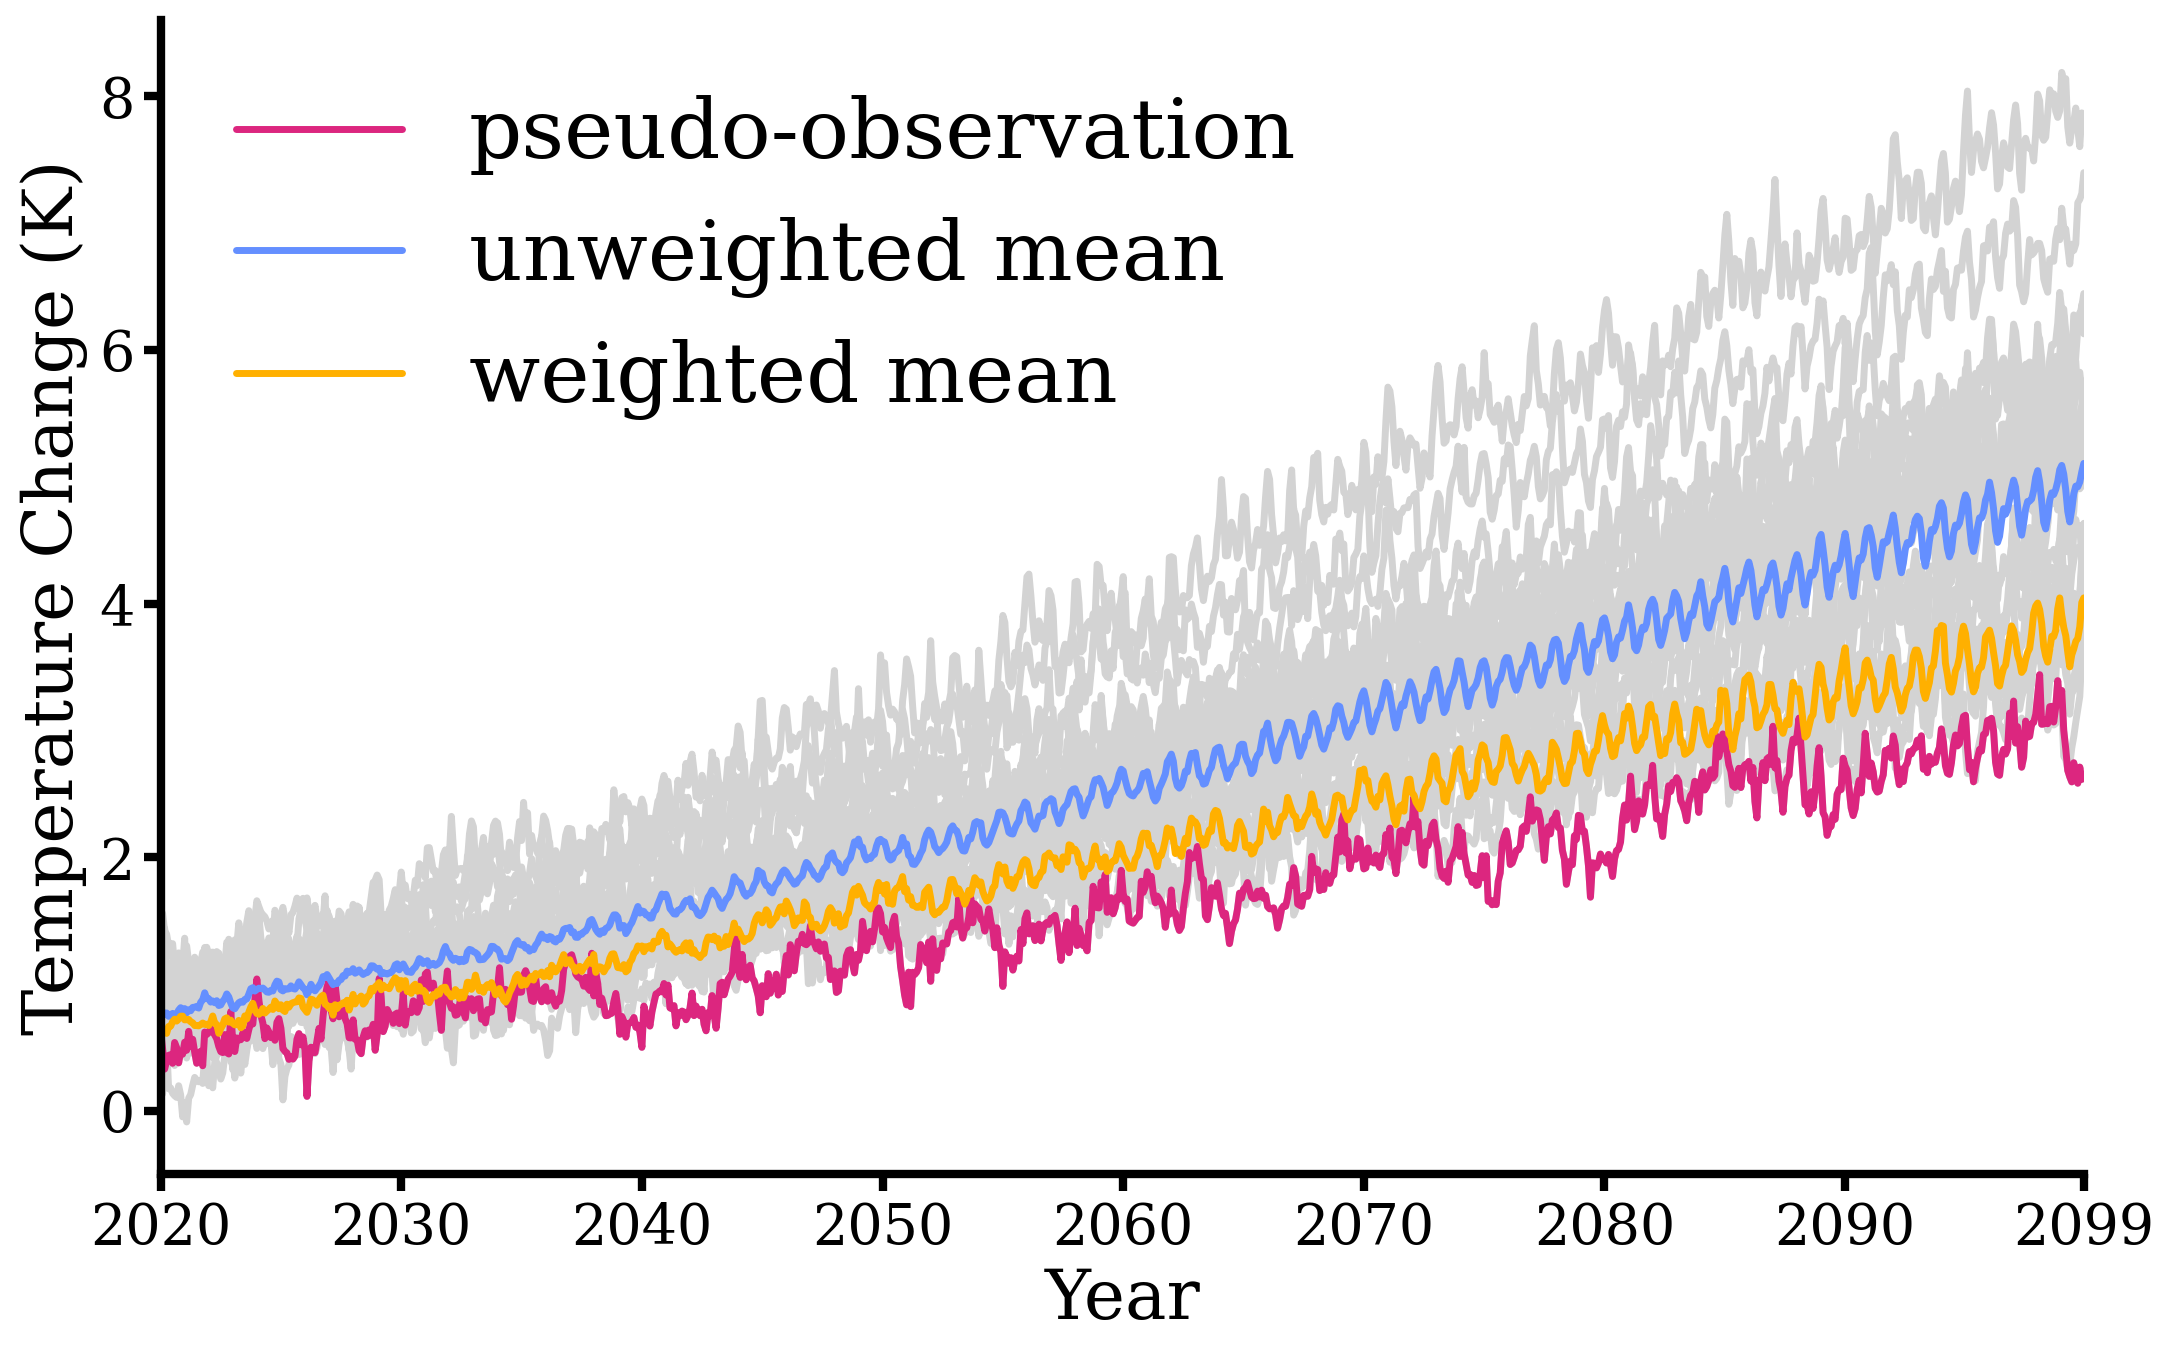

In [ ]:
fig, ax = plt.subplots(figsize=(11, 7))

#plot overall time period, weighted mean, unweighted mean, psuedo-obs, and trendline
for i in range(len(ds.tas.model)) :
  ax.plot(all[i], color='lightgray', linestyle='-')

#plot pseudo-observation in red (first model chosen for the example)
ax.plot(pseudo, color='#DC267F', label='pseudo-observation', linestyle='-')
#plot unweighted mean in blue
ax.plot(all.mean(axis=0), label="unweighted mean", color='#648FFF', linestyle='-')
#plot weighted mean in yellow
ax.plot(ds_gcm_weighted, label="weighted mean", color='#FFB000', linestyle='-')
#labels
# plt.xlabel("Year", fontsize = 30) ;
plt.xlabel("Year", fontsize = 25)
plt.ylabel("Temperature Change (K)", fontsize = 25)


plt.tight_layout()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


ax.set_xlim(0, 660)

ax.set_xticks(smaller)
ax.set_xticklabels(selected_years)

ax.legend(fontsize = 30)
plt.savefig('example_temp.png')